<a href="https://colab.research.google.com/github/psmouli14/final_project/blob/main/mini_imagenet_prototype_reptile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import glob
from PIL import Image
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mini-imagenet.tar.gz to mini-imagenet.tar.gz


In [3]:
!tar -zxvf mini-imagenet.tar.gz

mini-imagenet-cache-train.pkl
mini-imagenet-cache-val.pkl
mini-imagenet-cache-test.pkl


In [5]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    return cifar_dict

In [6]:
train = unpickle('mini-imagenet-cache-train.pkl')
val = unpickle('mini-imagenet-cache-val.pkl')
test = unpickle('mini-imagenet-cache-test.pkl')

In [7]:
val_keys = list(val.keys())
val_keys

['image_data', 'class_dict']

In [8]:
training_keys = list(train.keys())
training_keys

['image_data', 'class_dict']

In [9]:
test_keys = list(test.keys())
test_keys

['image_data', 'class_dict']

In [10]:
train_images = train['image_data']
train_labels = train['class_dict']
test_images = test['image_data']
test_labels = test['class_dict']
val_images = val['image_data']
val_labels = val['class_dict']
print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
print(type(train_labels))
print(train_labels.keys())
print(val_labels.keys())
print(test_labels.keys())

train_classes = len(train_labels.keys())
val_classes = len(val_labels.keys())
test_classes = len(test_labels.keys())
print(train_classes)
print(val_classes)
print(test_classes)


(38400, 84, 84, 3)
(9600, 84, 84, 3)
(12000, 84, 84, 3)
<class 'dict'>
dict_keys(['n01532829', 'n01558993', 'n01704323', 'n01749939', 'n01770081', 'n01843383', 'n01910747', 'n02074367', 'n02089867', 'n02091831', 'n02101006', 'n02105505', 'n02108089', 'n02108551', 'n02108915', 'n02111277', 'n02113712', 'n02120079', 'n02165456', 'n02457408', 'n02606052', 'n02687172', 'n02747177', 'n02795169', 'n02823428', 'n02966193', 'n03017168', 'n03047690', 'n03062245', 'n03207743', 'n03220513', 'n03337140', 'n03347037', 'n03400231', 'n03476684', 'n03527444', 'n03676483', 'n03838899', 'n03854065', 'n03888605', 'n03908618', 'n03924679', 'n03998194', 'n04067472', 'n04243546', 'n04251144', 'n04258138', 'n04275548', 'n04296562', 'n04389033', 'n04435653', 'n04443257', 'n04509417', 'n04515003', 'n04596742', 'n04604644', 'n04612504', 'n06794110', 'n07584110', 'n07697537', 'n07747607', 'n09246464', 'n13054560', 'n13133613'])
dict_keys(['n01855672', 'n02091244', 'n02114548', 'n02138441', 'n02174001', 'n0295082

In [11]:
train_images.dtype

dtype('uint8')

In [12]:
train_images[0]

array([[[ 93, 146, 198],
        [ 93, 146, 198],
        [ 92, 145, 197],
        ...,
        [ 94, 146, 196],
        [ 94, 146, 196],
        [ 94, 145, 198]],

       [[ 93, 146, 196],
        [ 94, 147, 197],
        [ 93, 146, 196],
        ...,
        [ 96, 148, 198],
        [ 94, 146, 196],
        [ 97, 148, 201]],

       [[ 93, 147, 194],
        [ 91, 145, 192],
        [ 93, 147, 194],
        ...,
        [ 94, 146, 196],
        [ 94, 146, 196],
        [ 94, 148, 200]],

       ...,

       [[ 30,  26,  39],
        [123, 166, 202],
        [105, 153, 200],
        ...,
        [100, 150, 199],
        [100, 150, 199],
        [102, 152, 201]],

       [[ 26,  49,  54],
        [102, 166, 228],
        [106, 153, 204],
        ...,
        [100, 150, 199],
        [102, 152, 201],
        [ 96, 146, 195]],

       [[125, 168, 203],
        [101, 154, 204],
        [ 98, 152, 202],
        ...,
        [100, 150, 202],
        [101, 151, 202],
        [102, 152, 201]]

In [ ]:
train_images = tf.cast(train_images, tf.float32)
train_images.shape
train_images = train_images/255
train_images[0]

<tf.Tensor: shape=(84, 84, 3), dtype=float32, numpy=
array([[[0.3647059 , 0.57254905, 0.7764706 ],
        [0.3647059 , 0.57254905, 0.7764706 ],
        [0.36078432, 0.5686275 , 0.77254903],
        ...,
        [0.36862746, 0.57254905, 0.76862746],
        [0.36862746, 0.57254905, 0.76862746],
        [0.36862746, 0.5686275 , 0.7764706 ]],

       [[0.3647059 , 0.57254905, 0.76862746],
        [0.36862746, 0.5764706 , 0.77254903],
        [0.3647059 , 0.57254905, 0.76862746],
        ...,
        [0.3764706 , 0.5803922 , 0.7764706 ],
        [0.36862746, 0.57254905, 0.76862746],
        [0.38039216, 0.5803922 , 0.7882353 ]],

       [[0.3647059 , 0.5764706 , 0.7607843 ],
        [0.35686275, 0.5686275 , 0.7529412 ],
        [0.3647059 , 0.5764706 , 0.7607843 ],
        ...,
        [0.36862746, 0.57254905, 0.76862746],
        [0.36862746, 0.57254905, 0.76862746],
        [0.36862746, 0.5803922 , 0.78431374]],

       ...,

       [[0.11764706, 0.10196079, 0.15294118],
        [0.4823

In [13]:
test_images = tf.cast(test_images, tf.float32)
test_images.shape
test_images = test_images/255
test_images[0]

<tf.Tensor: shape=(84, 84, 3), dtype=float32, numpy=
array([[[0.78431374, 0.9490196 , 0.9411765 ],
        [0.8       , 0.92156863, 0.9764706 ],
        [0.7921569 , 0.92156863, 0.98039216],
        ...,
        [0.8235294 , 0.87058824, 0.93333334],
        [0.80784315, 0.85882354, 0.9098039 ],
        [0.85490197, 0.8980392 , 0.92941177]],

       [[0.5411765 , 0.78431374, 0.90588236],
        [0.57254905, 0.78431374, 0.972549  ],
        [0.5176471 , 0.75686276, 0.9490196 ],
        ...,
        [0.72156864, 0.8666667 , 0.96862745],
        [0.7294118 , 0.87058824, 0.95686275],
        [0.7647059 , 0.90588236, 0.98039216]],

       [[0.45490196, 0.68235296, 0.8509804 ],
        [0.5176471 , 0.7294118 , 0.972549  ],
        [0.5058824 , 0.7607843 , 0.9882353 ],
        ...,
        [0.6862745 , 0.8117647 , 0.96862745],
        [0.6784314 , 0.8117647 , 0.9607843 ],
        [0.69803923, 0.83137256, 0.972549  ]],

       ...,

       [[0.91764706, 0.99607843, 0.99215686],
        [0.9137

In [14]:
val_images = tf.cast(val_images, tf.float32)
val_images = val_images/255
val_images[0]

<tf.Tensor: shape=(84, 84, 3), dtype=float32, numpy=
array([[[0.8745098 , 0.8       , 0.78431374],
        [0.85882354, 0.78431374, 0.76862746],
        [0.8509804 , 0.7764706 , 0.7607843 ],
        ...,
        [0.8392157 , 0.7607843 , 0.76862746],
        [0.84313726, 0.7607843 , 0.78039217],
        [0.8392157 , 0.7529412 , 0.7764706 ]],

       [[0.8980392 , 0.8352941 , 0.8392157 ],
        [0.8745098 , 0.80784315, 0.8117647 ],
        [0.87058824, 0.80784315, 0.8117647 ],
        ...,
        [0.83137256, 0.75686276, 0.77254903],
        [0.81960785, 0.74509805, 0.76862746],
        [0.8352941 , 0.7529412 , 0.7647059 ]],

       [[0.8509804 , 0.7764706 , 0.78431374],
        [0.85882354, 0.78431374, 0.7921569 ],
        [0.9098039 , 0.8352941 , 0.84313726],
        ...,
        [0.8392157 , 0.7764706 , 0.7921569 ],
        [0.8352941 , 0.76862746, 0.7921569 ],
        [0.8235294 , 0.7764706 , 0.7882353 ]],

       ...,

       [[0.78039217, 0.7294118 , 0.79607844],
        [0.8196

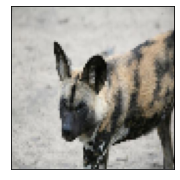

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,3))
plt.xticks([])
plt.yticks([])
plt.imshow(test_images[3030])


In [16]:
test_images.shape
print(test_labels)

{'n01930112': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

In [17]:
num_class = 100
images_per_class = 600


In [18]:

def get_next_batch(dataset, no_of_classes, num_way, num_shot, num_query):
  episodic_classes = np.random.permutation(no_of_classes)[:num_way]
  support = np.zeros([num_way, num_shot, 84, 84, 3], dtype=np.float32)
  query = np.zeros([num_way, num_query, 84, 84, 3], dtype=np.float32)

  for index, class_ in enumerate(episodic_classes):
    start_index = find_start_index(class_)
    #check that the size is greater than num_shot + num_query
    indices = np.arange(start_index, start_index + images_per_class)
    selected = np.random.permutation(indices)[:num_shot + num_query]
    for support_index in range(num_shot):
       support[index][support_index] = dataset[selected[support_index]] 
    for query_index in range(num_query):
       query[index][query_index] = dataset[selected[num_shot + query_index]]  
    #support[index] = dataset[int(selected[:num_shot])]
    #query[index] = dataset[int(selected[num_shot:])]
    
  return support, query

def find_start_index(class_):
  return 600 * class_



In [19]:
support, query = get_next_batch(test_images, test_classes, 20, 7, 3)

In [20]:
support.shape

(20, 7, 84, 84, 3)

In [21]:
query.shape

(20, 3, 84, 84, 3)

In [22]:
def show_image(dataset, index, image_number):
  plt.figure(figsize=(2,3))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(dataset[index][image_number])


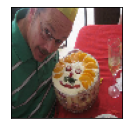

In [23]:
show_image(support, 2, 5)

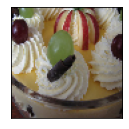

In [24]:
show_image(query, 2, 2)

In [25]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [26]:
class Prototypical(Model):
    """
    Implemenation of Prototypical Network.
    """
    def __init__(self, n_support, n_query, w, h, c):
        """
        Args:
            n_support (int): number of support examples.
            n_query (int): number of query examples.
            w (int): image width .
            h (int): image height.
            c (int): number of channels.
        """
        super(Prototypical, self).__init__()
        self.w, self.h, self.c = w, h, c

        # Encoder as ResNet like CNN with 4 blocks
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPool2D((2, 2)),

            tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPool2D((2, 2)),

            tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPool2D((2, 2)),

            tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPool2D((2, 2)), Flatten()]
        )

    def call(self, support, query):
        n_class = support.shape[0]
        n_support = support.shape[1]
        n_query = query.shape[1]
        y = np.tile(np.arange(n_class)[:, np.newaxis], (1, n_query))
        y_onehot = tf.cast(tf.one_hot(y, n_class), tf.float32)

        # correct indices of support samples (just natural order)
        target_inds = tf.reshape(tf.range(n_class), [n_class, 1])
        target_inds = tf.tile(target_inds, [1, n_query])

        # merge support and query to forward through encoder
        cat = tf.concat([
            tf.reshape(support, [n_class * n_support,
                                 self.w, self.h, self.c]),
            tf.reshape(query, [n_class * n_query,
                               self.w, self.h, self.c])], axis=0)
        z = self.encoder(cat)

        # Divide embedding into support and query
        z_prototypes = tf.reshape(z[:n_class * n_support],
                                  [n_class, n_support, z.shape[-1]])
        # Prototypes are means of n_support examples
        z_prototypes = tf.math.reduce_mean(z_prototypes, axis=1)
        z_query = z[n_class * n_support:]

        # Calculate distances between query and prototypes
        dists = euclidean_distance(z_query, z_prototypes)

        # log softmax of calculated distances
        log_p_y = tf.nn.log_softmax(-dists, axis=-1)
        log_p_y = tf.reshape(log_p_y, [n_class, n_query, -1])
        
        loss = -tf.reduce_mean(tf.reshape(tf.reduce_sum(tf.multiply(y_onehot, log_p_y), axis=-1), [-1]))
        eq = tf.cast(tf.equal(
            tf.cast(tf.argmax(log_p_y, axis=-1), tf.int32), 
            tf.cast(y, tf.int32)), tf.float32)
        acc = tf.reduce_mean(eq)
        return loss, acc

    def save(self, model_path):
        """
        Save encoder to the file.

        Args:
            model_path (str): path to the .h5 file.

        Returns: None

        """
        self.encoder.save(model_path)

    def load(self, model_path):
        """
        Load encoder from the file.

        Args:
            model_path (str): path to the .h5 file.

        Returns: None

        """
        self.encoder(tf.zeros([1, self.w, self.h, self.c]))
        self.encoder.load_weights(model_path)

In [27]:
def euclidean_distance(a, b):

    N, D = tf.shape(a)[0], tf.shape(a)[1]
    M = tf.shape(b)[0]
    a = tf.tile(tf.expand_dims(a, axis=1), (1, M, 1))
    b = tf.tile(tf.expand_dims(b, axis=0), (N, 1, 1))
    return tf.reduce_mean(tf.square(a - b), axis=2)

In [39]:
num_ways = [5, 5]
num_shots = [5, 1]
learning_rate = 0.001
img_width = 84
img_height = 84
channels = 3
num_classes = 100

In [38]:
#number of classes
num_way = num_ways[0] 

#number of examples per class for support set
num_shot = num_shots[0]  

#number of query points
num_query = num_shots[0] 

train_loss = tf.metrics.Mean(name='train_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
support = np.zeros([num_way, num_shot, img_height, img_width, 1], dtype=np.float32)
query = np.zeros([num_way, num_query, img_height, img_width, 1], dtype=np.float32)
model = Prototypical(support, query, 84, 84, 3)
optimizer = tf.keras.optimizers.Adam(0.001)

num_epochs = 300
num_episodes = 100
save_path = "./results/models/mini_train0.h5"

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  train_loss(loss)
  train_acc(acc)

@tf.function
def val_step(loss_func, support, query):
  loss, acc = loss_func(support, query)
  val_loss(loss)
  val_acc(acc)

least_loss = {'least_loss': 100.00}

for epoch in range(num_epochs):
  train_loss.reset_states()
  train_acc.reset_states()

  for episode in range(num_episodes):
    train_support, train_query = get_next_batch(train_images, train_classes, num_way, num_shot, num_query)
    train_step(train_support, train_query)

  cur_loss = train_loss.result().numpy()
  if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)
  template = 'Epoch {}, Loss: {}, Accuracy: {}'
  print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100))

Saving new best model with loss:  1.5305619
Epoch 1, Loss: 1.530561923980713, Accuracy: 37.920005798339844


Saving new best model with loss:  1.4820148
Epoch 2, Loss: 1.482014775276184, Accuracy: 38.03999328613281


Saving new best model with loss:  1.4393642
Epoch 3, Loss: 1.4393641948699951, Accuracy: 42.3599967956543


Saving new best model with loss:  1.4200293
Epoch 4, Loss: 1.4200292825698853, Accuracy: 42.3599967956543
Epoch 5, Loss: 1.446049451828003, Accuracy: 41.000003814697266


Saving new best model with loss:  1.3940169
Epoch 6, Loss: 1.3940168619155884, Accuracy: 43.480003356933594


Saving new best model with loss:  1.3340921
Epoch 7, Loss: 1.334092140197754, Accuracy: 44.56001281738281
Epoch 8, Loss: 1.378828525543213, Accuracy: 44.40000915527344


Saving new best model with loss:  1.3269789
Epoch 9, Loss: 1.3269789218902588, Accuracy: 46.60000228881836


Saving new best model with loss:  1.3206508
Epoch 10, Loss: 1.3206508159637451, Accuracy: 46.31998825073242
Epoch 11, Loss: 1.3208084106445312, Accuracy: 45.8799934387207


Saving new best model with loss:  1.3036561
Epoch 12, Loss: 1.3036561012268066, Accuracy: 48.07999801635742
Epoch 13, Loss: 1.333315372467041, Accuracy: 46.079994201660156


Saving new best model with loss:  1.2907758
Epoch 14, Loss: 1.2907757759094238, Accuracy: 48.679996490478516


Saving new best model with loss:  1.245876
Epoch 15, Loss: 1.2458759546279907, Accuracy: 50.76000213623047
Epoch 16, Loss: 1.298902153968811, Accuracy: 47.68000030517578


Saving new best model with loss:  1.2400059
Epoch 17, Loss: 1.2400058507919312, Accuracy: 49.76000213623047


Saving new best model with loss:  1.2269326
Epoch 18, Loss: 1.2269326448440552, Accuracy: 52.07999801635742
Epoch 19, Loss: 1.2366052865982056, Accuracy: 52.19999694824219


Saving new best model with loss:  1.2159494
Epoch 20, Loss: 1.2159494161605835, Accuracy: 51.72000503540039


Saving new best model with loss:  1.1716748
Epoch 21, Loss: 1.1716748476028442, Accuracy: 54.359989166259766
Epoch 22, Loss: 1.1872432231903076, Accuracy: 51.720001220703125
Epoch 23, Loss: 1.1733155250549316, Accuracy: 54.7599983215332
Epoch 24, Loss: 1.1849559545516968, Accuracy: 53.799991607666016
Epoch 25, Loss: 1.2030812501907349, Accuracy: 53.36000442504883


Saving new best model with loss:  1.1420131
Epoch 26, Loss: 1.1420130729675293, Accuracy: 54.359989166259766
Epoch 27, Loss: 1.2249324321746826, Accuracy: 52.519996643066406
Epoch 28, Loss: 1.2042375802993774, Accuracy: 53.43999099731445
Epoch 29, Loss: 1.14662504196167, Accuracy: 54.920013427734375


Saving new best model with loss:  1.1015044
Epoch 30, Loss: 1.1015044450759888, Accuracy: 56.919986724853516
Epoch 31, Loss: 1.140224814414978, Accuracy: 56.040000915527344
Epoch 32, Loss: 1.1461797952651978, Accuracy: 55.23998260498047
Epoch 33, Loss: 1.106689214706421, Accuracy: 56.159996032714844
Epoch 34, Loss: 1.1277782917022705, Accuracy: 55.71998977661133
Epoch 35, Loss: 1.1430480480194092, Accuracy: 55.159996032714844
Epoch 36, Loss: 1.121433138847351, Accuracy: 57.48000717163086
Epoch 37, Loss: 1.1253750324249268, Accuracy: 57.31999969482422


Saving new best model with loss:  1.1008414
Epoch 38, Loss: 1.1008414030075073, Accuracy: 57.479976654052734
Epoch 39, Loss: 1.106328010559082, Accuracy: 57.31999969482422


Saving new best model with loss:  1.098973
Epoch 40, Loss: 1.098973035812378, Accuracy: 57.160003662109375


Saving new best model with loss:  1.0584834
Epoch 41, Loss: 1.058483362197876, Accuracy: 59.280006408691406
Epoch 42, Loss: 1.0876073837280273, Accuracy: 57.31998825073242
Epoch 43, Loss: 1.1214237213134766, Accuracy: 58.03999328613281
Epoch 44, Loss: 1.077282190322876, Accuracy: 57.399993896484375
Epoch 45, Loss: 1.0718131065368652, Accuracy: 59.079986572265625


Saving new best model with loss:  1.0491661
Epoch 46, Loss: 1.0491660833358765, Accuracy: 58.84000015258789
Epoch 47, Loss: 1.0565074682235718, Accuracy: 58.880001068115234


Saving new best model with loss:  1.0221887
Epoch 48, Loss: 1.022188663482666, Accuracy: 60.8800048828125
Epoch 49, Loss: 1.0551353693008423, Accuracy: 60.15999221801758
Epoch 50, Loss: 1.0387816429138184, Accuracy: 59.91999053955078
Epoch 51, Loss: 1.060611605644226, Accuracy: 59.639991760253906


Saving new best model with loss:  1.0117058
Epoch 52, Loss: 1.011705756187439, Accuracy: 59.839988708496094
Epoch 53, Loss: 1.0135674476623535, Accuracy: 60.399986267089844
Epoch 54, Loss: 1.0793167352676392, Accuracy: 58.159996032714844
Epoch 55, Loss: 1.0449432134628296, Accuracy: 58.79998779296875
Epoch 56, Loss: 1.0128666162490845, Accuracy: 61.79998016357422
Epoch 57, Loss: 1.0382580757141113, Accuracy: 60.52000427246094


Saving new best model with loss:  0.96325713
Epoch 58, Loss: 0.9632571339607239, Accuracy: 62.799991607666016
Epoch 59, Loss: 0.984373152256012, Accuracy: 63.03998947143555
Epoch 60, Loss: 1.0334504842758179, Accuracy: 59.87998962402344
Epoch 61, Loss: 0.9895164370536804, Accuracy: 60.999996185302734
Epoch 62, Loss: 1.010145902633667, Accuracy: 60.91999816894531
Epoch 63, Loss: 0.9919019341468811, Accuracy: 61.55999755859375
Epoch 64, Loss: 1.0211230516433716, Accuracy: 61.87999725341797
Epoch 65, Loss: 1.0152535438537598, Accuracy: 60.64000701904297
Epoch 66, Loss: 0.9733750224113464, Accuracy: 61.9999885559082
Epoch 67, Loss: 0.9932266473770142, Accuracy: 61.75999450683594
Epoch 68, Loss: 0.9913807511329651, Accuracy: 61.439998626708984
Epoch 69, Loss: 0.9810168743133545, Accuracy: 61.679996490478516


Saving new best model with loss:  0.96042246
Epoch 70, Loss: 0.9604224562644958, Accuracy: 63.43999481201172


Saving new best model with loss:  0.959791
Epoch 71, Loss: 0.9597910046577454, Accuracy: 62.83998489379883
Epoch 72, Loss: 0.9642911553382874, Accuracy: 62.68000793457031


Saving new best model with loss:  0.95129484
Epoch 73, Loss: 0.9512948393821716, Accuracy: 62.87998580932617
Epoch 74, Loss: 0.9888708591461182, Accuracy: 62.039981842041016


Saving new best model with loss:  0.9435231
Epoch 75, Loss: 0.943523108959198, Accuracy: 64.15998840332031
Epoch 76, Loss: 0.9575576186180115, Accuracy: 63.279998779296875


Saving new best model with loss:  0.9274065
Epoch 77, Loss: 0.9274064898490906, Accuracy: 64.75997161865234
Epoch 78, Loss: 0.9465910196304321, Accuracy: 64.27999877929688
Epoch 79, Loss: 0.9342019557952881, Accuracy: 63.48000717163086


Saving new best model with loss:  0.92629206
Epoch 80, Loss: 0.9262920618057251, Accuracy: 65.31999206542969
Epoch 81, Loss: 0.9386953115463257, Accuracy: 63.92000198364258


Saving new best model with loss:  0.91935354
Epoch 82, Loss: 0.9193535447120667, Accuracy: 64.11997985839844


Saving new best model with loss:  0.8954686
Epoch 83, Loss: 0.8954685926437378, Accuracy: 65.79999542236328
Epoch 84, Loss: 0.929049015045166, Accuracy: 64.68000030517578
Epoch 85, Loss: 0.948883593082428, Accuracy: 62.840003967285156
Epoch 86, Loss: 0.8964085578918457, Accuracy: 65.63997650146484


Saving new best model with loss:  0.88714117
Epoch 87, Loss: 0.8871411681175232, Accuracy: 65.7599868774414
Epoch 88, Loss: 0.9396629333496094, Accuracy: 64.239990234375
Epoch 89, Loss: 0.9404492974281311, Accuracy: 62.919979095458984
Epoch 90, Loss: 0.8961225748062134, Accuracy: 65.44000244140625
Epoch 91, Loss: 0.8987892866134644, Accuracy: 64.55999755859375
Epoch 92, Loss: 0.960243284702301, Accuracy: 63.320003509521484


Saving new best model with loss:  0.87532717
Epoch 93, Loss: 0.8753271698951721, Accuracy: 66.03998565673828
Epoch 94, Loss: 0.9471069574356079, Accuracy: 62.639991760253906
Epoch 95, Loss: 0.9336718916893005, Accuracy: 63.76000213623047
Epoch 96, Loss: 0.9294288158416748, Accuracy: 63.160003662109375
Epoch 97, Loss: 0.8776699900627136, Accuracy: 67.16000366210938
Epoch 98, Loss: 0.9124196767807007, Accuracy: 64.84000396728516
Epoch 99, Loss: 0.8959925174713135, Accuracy: 64.9599838256836
Epoch 100, Loss: 0.8993958234786987, Accuracy: 65.3599853515625
Epoch 101, Loss: 0.8894211649894714, Accuracy: 64.6399917602539
Epoch 102, Loss: 0.913473904132843, Accuracy: 65.1199951171875
Epoch 103, Loss: 0.8961263298988342, Accuracy: 64.68000030517578
Epoch 104, Loss: 0.9219444394111633, Accuracy: 64.95999908447266
Epoch 105, Loss: 0.8813198208808899, Accuracy: 65.9599838256836
Epoch 106, Loss: 0.9140312075614929, Accuracy: 66.91999053955078
Epoch 107, Loss: 0.8882526159286499, Accuracy: 66.399993

Saving new best model with loss:  0.86192703
Epoch 108, Loss: 0.8619270324707031, Accuracy: 66.55998992919922
Epoch 109, Loss: 0.8762730360031128, Accuracy: 67.1199951171875
Epoch 110, Loss: 0.8898504376411438, Accuracy: 65.07998657226562


Saving new best model with loss:  0.8479434
Epoch 111, Loss: 0.8479434251785278, Accuracy: 67.91996765136719
Epoch 112, Loss: 0.8842530846595764, Accuracy: 66.11997985839844
Epoch 113, Loss: 0.9273214936256409, Accuracy: 63.52000427246094
Epoch 114, Loss: 0.8639755249023438, Accuracy: 66.99999237060547
Epoch 115, Loss: 0.8791171312332153, Accuracy: 66.67998504638672
Epoch 116, Loss: 0.885659396648407, Accuracy: 66.08000183105469
Epoch 117, Loss: 0.8920104503631592, Accuracy: 65.91999816894531
Epoch 118, Loss: 0.8581153750419617, Accuracy: 67.5999984741211


Saving new best model with loss:  0.8410078
Epoch 119, Loss: 0.8410078287124634, Accuracy: 68.3599853515625


Saving new best model with loss:  0.8325086
Epoch 120, Loss: 0.8325086236000061, Accuracy: 68.15998840332031
Epoch 121, Loss: 0.8754919171333313, Accuracy: 67.51998138427734
Epoch 122, Loss: 0.8384657502174377, Accuracy: 68.39999389648438
Epoch 123, Loss: 0.8481701016426086, Accuracy: 66.87999725341797
Epoch 124, Loss: 0.8742234706878662, Accuracy: 66.91996765136719
Epoch 125, Loss: 0.8685891032218933, Accuracy: 67.08000946044922


Saving new best model with loss:  0.8188819
Epoch 126, Loss: 0.8188819289207458, Accuracy: 67.31999206542969
Epoch 127, Loss: 0.8730093240737915, Accuracy: 66.43999481201172
Epoch 128, Loss: 0.8399476408958435, Accuracy: 67.84000396728516


Saving new best model with loss:  0.7981235
Epoch 129, Loss: 0.7981234788894653, Accuracy: 70.03999328613281
Epoch 130, Loss: 0.8820643424987793, Accuracy: 64.63999938964844
Epoch 131, Loss: 0.8587011694908142, Accuracy: 66.7599868774414
Epoch 132, Loss: 0.8109087944030762, Accuracy: 68.3600082397461
Epoch 133, Loss: 0.8217609524726868, Accuracy: 68.43997955322266
Epoch 134, Loss: 0.8465888500213623, Accuracy: 67.43998718261719
Epoch 135, Loss: 0.8298349976539612, Accuracy: 68.71998596191406
Epoch 136, Loss: 0.8088252544403076, Accuracy: 70.07999420166016
Epoch 137, Loss: 0.8498288989067078, Accuracy: 67.03999328613281
Epoch 138, Loss: 0.8827031850814819, Accuracy: 65.51998138427734
Epoch 139, Loss: 0.8128926753997803, Accuracy: 69.52000427246094
Epoch 140, Loss: 0.8034887909889221, Accuracy: 70.04000091552734
Epoch 141, Loss: 0.8324653506278992, Accuracy: 68.83998107910156
Epoch 142, Loss: 0.8574880361557007, Accuracy: 67.04000091552734
Epoch 143, Loss: 0.8462876677513123, Accuracy: 6

Saving new best model with loss:  0.7901205
Epoch 145, Loss: 0.7901204824447632, Accuracy: 69.63998413085938
Epoch 146, Loss: 0.8269263505935669, Accuracy: 68.8799819946289
Epoch 147, Loss: 0.8105245232582092, Accuracy: 69.36000061035156
Epoch 148, Loss: 0.811196506023407, Accuracy: 68.43999481201172
Epoch 149, Loss: 0.8203170299530029, Accuracy: 68.51998138427734
Epoch 150, Loss: 0.792130708694458, Accuracy: 69.03998565673828
Epoch 151, Loss: 0.8811108469963074, Accuracy: 66.92000579833984
Epoch 152, Loss: 0.8269075155258179, Accuracy: 68.55998229980469


Saving new best model with loss:  0.766513
Epoch 153, Loss: 0.7665129899978638, Accuracy: 70.6399917602539
Epoch 154, Loss: 0.7804913520812988, Accuracy: 70.31999206542969
Epoch 155, Loss: 0.8358137607574463, Accuracy: 68.31999969482422
Epoch 156, Loss: 0.8078551292419434, Accuracy: 69.3599853515625
Epoch 157, Loss: 0.8413019776344299, Accuracy: 67.59998321533203
Epoch 158, Loss: 0.7883303165435791, Accuracy: 70.15998077392578
Epoch 159, Loss: 0.7726236581802368, Accuracy: 71.15998077392578
Epoch 160, Loss: 0.8160523176193237, Accuracy: 68.239990234375
Epoch 161, Loss: 0.8039999604225159, Accuracy: 69.84000396728516
Epoch 162, Loss: 0.7996039390563965, Accuracy: 69.8399887084961
Epoch 163, Loss: 0.788573145866394, Accuracy: 69.31999969482422
Epoch 164, Loss: 0.8108156323432922, Accuracy: 68.43999481201172
Epoch 165, Loss: 0.8154539465904236, Accuracy: 68.6399917602539
Epoch 166, Loss: 0.8155277967453003, Accuracy: 69.11997985839844
Epoch 167, Loss: 0.8261238932609558, Accuracy: 67.0
Ep

Saving new best model with loss:  0.7624125
Epoch 179, Loss: 0.7624124884605408, Accuracy: 70.9999771118164


Saving new best model with loss:  0.7541441
Epoch 180, Loss: 0.7541440725326538, Accuracy: 71.27997589111328
Epoch 181, Loss: 0.8065811395645142, Accuracy: 68.7599868774414
Epoch 182, Loss: 0.7945600152015686, Accuracy: 70.51997375488281
Epoch 183, Loss: 0.7905794382095337, Accuracy: 68.91999053955078
Epoch 184, Loss: 0.7560329437255859, Accuracy: 71.03997802734375
Epoch 185, Loss: 0.798464834690094, Accuracy: 69.07998657226562


Saving new best model with loss:  0.74843764
Epoch 186, Loss: 0.7484376430511475, Accuracy: 71.43998718261719
Epoch 187, Loss: 0.8273447155952454, Accuracy: 68.15998077392578
Epoch 188, Loss: 0.8296321034431458, Accuracy: 68.68000030517578


Saving new best model with loss:  0.74755967
Epoch 189, Loss: 0.747559666633606, Accuracy: 70.63997650146484
Epoch 190, Loss: 0.7610453963279724, Accuracy: 69.91999053955078
Epoch 191, Loss: 0.8013960123062134, Accuracy: 68.5199966430664
Epoch 192, Loss: 0.7607400417327881, Accuracy: 72.3199691772461
Epoch 193, Loss: 0.7884640693664551, Accuracy: 69.83999633789062
Epoch 194, Loss: 0.8093758225440979, Accuracy: 69.91999816894531
Epoch 195, Loss: 0.7879109382629395, Accuracy: 70.63996887207031


Saving new best model with loss:  0.7351173
Epoch 196, Loss: 0.7351173162460327, Accuracy: 71.63999938964844
Epoch 197, Loss: 0.7445141673088074, Accuracy: 71.91998291015625
Epoch 198, Loss: 0.7796890139579773, Accuracy: 70.03998565673828
Epoch 199, Loss: 0.7771710753440857, Accuracy: 70.15999603271484
Epoch 200, Loss: 0.7685898542404175, Accuracy: 70.239990234375


Saving new best model with loss:  0.69223845
Epoch 201, Loss: 0.692238450050354, Accuracy: 73.6399917602539
Epoch 202, Loss: 0.7121429443359375, Accuracy: 72.63997650146484
Epoch 203, Loss: 0.7783993482589722, Accuracy: 69.67997741699219
Epoch 204, Loss: 0.7713505625724792, Accuracy: 70.7199935913086
Epoch 205, Loss: 0.7620686888694763, Accuracy: 70.60000610351562
Epoch 206, Loss: 0.7503758072853088, Accuracy: 70.59998321533203
Epoch 207, Loss: 0.7468492984771729, Accuracy: 72.51998901367188
Epoch 208, Loss: 0.7718235850334167, Accuracy: 71.12000274658203
Epoch 209, Loss: 0.7446662187576294, Accuracy: 71.7199935913086
Epoch 210, Loss: 0.750429093837738, Accuracy: 71.19999694824219
Epoch 211, Loss: 0.750103235244751, Accuracy: 70.39998626708984
Epoch 212, Loss: 0.7697178721427917, Accuracy: 69.55999755859375
Epoch 213, Loss: 0.7799618244171143, Accuracy: 70.31999206542969
Epoch 214, Loss: 0.6980953216552734, Accuracy: 73.67999267578125
Epoch 215, Loss: 0.8079786896705627, Accuracy: 68.5

Saving new best model with loss:  0.6655491
Epoch 262, Loss: 0.665549099445343, Accuracy: 75.63998413085938
Epoch 263, Loss: 0.6727954149246216, Accuracy: 74.47998809814453
Epoch 264, Loss: 0.7363635897636414, Accuracy: 71.19998168945312
Epoch 265, Loss: 0.6917685866355896, Accuracy: 74.47998046875
Epoch 266, Loss: 0.7386115789413452, Accuracy: 71.80000305175781
Epoch 267, Loss: 0.7506627440452576, Accuracy: 70.59998321533203


Saving new best model with loss:  0.6220625
Epoch 268, Loss: 0.6220625042915344, Accuracy: 76.47998809814453
Epoch 269, Loss: 0.6661522388458252, Accuracy: 74.43998718261719
Epoch 270, Loss: 0.7014400362968445, Accuracy: 73.19999694824219
Epoch 271, Loss: 0.7115061283111572, Accuracy: 73.47996520996094
Epoch 272, Loss: 0.7060481905937195, Accuracy: 73.5999984741211
Epoch 273, Loss: 0.6803774833679199, Accuracy: 73.71998596191406
Epoch 274, Loss: 0.7021225690841675, Accuracy: 72.95999145507812
Epoch 275, Loss: 0.6827738285064697, Accuracy: 73.91999053955078
Epoch 276, Loss: 0.692238450050354, Accuracy: 73.91997528076172
Epoch 277, Loss: 0.6872799396514893, Accuracy: 73.79998016357422
Epoch 278, Loss: 0.6710087656974792, Accuracy: 73.9999771118164
Epoch 279, Loss: 0.7339423894882202, Accuracy: 72.56000518798828
Epoch 280, Loss: 0.6858137249946594, Accuracy: 74.27999114990234
Epoch 281, Loss: 0.7103102803230286, Accuracy: 73.87997436523438
Epoch 282, Loss: 0.6523162126541138, Accuracy: 75

In [40]:
#number of classes
num_way = num_ways[1] 

#number of examples per class for support set
num_shot = num_shots[1]  

#number of query points
num_query = num_shots[1] 

train_loss = tf.metrics.Mean(name='train_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
support = np.zeros([num_way, num_shot, img_height, img_width, 1], dtype=np.float32)
query = np.zeros([num_way, num_query, img_height, img_width, 1], dtype=np.float32)
model = Prototypical(support, query, 84, 84, 3)
optimizer = tf.keras.optimizers.Adam(0.001)

num_epochs = 300
num_episodes = 100
save_path = "./results/models/mini_train1.h5"

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  train_loss(loss)
  train_acc(acc)

@tf.function
def val_step(loss_func, support, query):
  loss, acc = loss_func(support, query)
  val_loss(loss)
  val_acc(acc)

least_loss = {'least_loss': 100.00}

for epoch in range(num_epochs):
  train_loss.reset_states()
  train_acc.reset_states()

  for episode in range(num_episodes):
    train_support, train_query = get_next_batch(train_images, train_classes, num_way, num_shot, num_query)
    train_step(train_support, train_query)

  cur_loss = train_loss.result().numpy()
  if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)
  template = 'Epoch {}, Loss: {}, Accuracy: {}'
  print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100))

Saving new best model with loss:  1.8170062
Epoch 1, Loss: 1.817006230354309, Accuracy: 29.59999656677246


Saving new best model with loss:  1.5980679
Epoch 2, Loss: 1.5980678796768188, Accuracy: 27.000001907348633


Saving new best model with loss:  1.5783811
Epoch 3, Loss: 1.578381061553955, Accuracy: 29.800016403198242


Saving new best model with loss:  1.5738657
Epoch 4, Loss: 1.5738656520843506, Accuracy: 31.200010299682617
Epoch 5, Loss: 1.5962512493133545, Accuracy: 26.000001907348633
Epoch 6, Loss: 1.5899502038955688, Accuracy: 26.399999618530273
Epoch 7, Loss: 1.5776376724243164, Accuracy: 33.00000762939453
Epoch 8, Loss: 1.5874055624008179, Accuracy: 27.799999237060547
Epoch 9, Loss: 1.592678189277649, Accuracy: 28.60000991821289
Epoch 10, Loss: 1.5960270166397095, Accuracy: 30.200008392333984
Epoch 11, Loss: 1.591036319732666, Accuracy: 28.800006866455078
Epoch 12, Loss: 1.6099395751953125, Accuracy: 23.400005340576172
Epoch 13, Loss: 1.5990464687347412, Accuracy: 27.00000762939453
Epoch 14, Loss: 1.605156660079956, Accuracy: 25.60000991821289
Epoch 15, Loss: 1.6224685907363892, Accuracy: 26.200014114379883
Epoch 16, Loss: 1.6118780374526978, Accuracy: 30.400001525878906
Epoch 17, Loss: 1.5985352993011475, Accuracy: 27.800010681152344
Epoch 18, Loss: 1.615676999092102, Accuracy: 28.79999542236

Saving new best model with loss:  1.5713428
Epoch 54, Loss: 1.5713428258895874, Accuracy: 29.199993133544922
Epoch 55, Loss: 1.5884591341018677, Accuracy: 28.199996948242188


Saving new best model with loss:  1.5657837
Epoch 56, Loss: 1.5657837390899658, Accuracy: 29.60000991821289
Epoch 57, Loss: 1.5766587257385254, Accuracy: 29.19999885559082


Saving new best model with loss:  1.5637089
Epoch 58, Loss: 1.5637089014053345, Accuracy: 30.200016021728516
Epoch 59, Loss: 1.5717309713363647, Accuracy: 29.200008392333984
Epoch 60, Loss: 1.5704656839370728, Accuracy: 32.20001220703125
Epoch 61, Loss: 1.581113338470459, Accuracy: 27.200000762939453
Epoch 62, Loss: 1.5793975591659546, Accuracy: 28.40000343322754
Epoch 63, Loss: 1.5943591594696045, Accuracy: 26.600000381469727
Epoch 64, Loss: 1.5907173156738281, Accuracy: 30.200008392333984
Epoch 65, Loss: 1.5901985168457031, Accuracy: 25.600008010864258
Epoch 66, Loss: 1.586402416229248, Accuracy: 30.20000457763672
Epoch 67, Loss: 1.5717462301254272, Accuracy: 30.00000762939453
Epoch 68, Loss: 1.6154898405075073, Accuracy: 25.800020217895508
Epoch 69, Loss: 1.6088734865188599, Accuracy: 25.80000114440918
Epoch 70, Loss: 1.6021003723144531, Accuracy: 27.200000762939453


Saving new best model with loss:  1.5566028
Epoch 71, Loss: 1.5566028356552124, Accuracy: 29.600006103515625
Epoch 72, Loss: 1.6061034202575684, Accuracy: 25.000009536743164
Epoch 73, Loss: 1.6088465452194214, Accuracy: 25.200000762939453
Epoch 74, Loss: 1.5975040197372437, Accuracy: 24.600000381469727
Epoch 75, Loss: 1.5826796293258667, Accuracy: 25.799999237060547
Epoch 76, Loss: 1.5786575078964233, Accuracy: 27.80000877380371
Epoch 77, Loss: 1.5772209167480469, Accuracy: 29.0000057220459
Epoch 78, Loss: 1.582288384437561, Accuracy: 28.400009155273438
Epoch 79, Loss: 1.5632297992706299, Accuracy: 30.20000457763672
Epoch 80, Loss: 1.5806463956832886, Accuracy: 28.000003814697266
Epoch 81, Loss: 1.5856215953826904, Accuracy: 30.000003814697266


Saving new best model with loss:  1.5494128
Epoch 82, Loss: 1.5494128465652466, Accuracy: 30.200000762939453
Epoch 83, Loss: 1.5583034753799438, Accuracy: 27.600006103515625


Saving new best model with loss:  1.5444728
Epoch 84, Loss: 1.5444728136062622, Accuracy: 30.400007247924805
Epoch 85, Loss: 1.5765330791473389, Accuracy: 31.400009155273438
Epoch 86, Loss: 1.558260202407837, Accuracy: 35.599998474121094
Epoch 87, Loss: 1.5560507774353027, Accuracy: 28.60000991821289
Epoch 88, Loss: 1.546186923980713, Accuracy: 31.000003814697266
Epoch 89, Loss: 1.5686509609222412, Accuracy: 30.20000457763672


Saving new best model with loss:  1.5357001
Epoch 90, Loss: 1.5357000827789307, Accuracy: 29.800003051757812
Epoch 91, Loss: 1.569483995437622, Accuracy: 31.40000343322754
Epoch 92, Loss: 1.5507889986038208, Accuracy: 29.59999656677246
Epoch 93, Loss: 1.54433274269104, Accuracy: 31.600004196166992


Saving new best model with loss:  1.5291535
Epoch 94, Loss: 1.5291534662246704, Accuracy: 33.40000915527344
Epoch 95, Loss: 1.5742738246917725, Accuracy: 30.199995040893555
Epoch 96, Loss: 1.5600714683532715, Accuracy: 29.800006866455078
Epoch 97, Loss: 1.555006980895996, Accuracy: 32.60000991821289
Epoch 98, Loss: 1.5343806743621826, Accuracy: 32.400001525878906


Saving new best model with loss:  1.5180907
Epoch 99, Loss: 1.5180907249450684, Accuracy: 31.80000114440918


Saving new best model with loss:  1.5176773
Epoch 100, Loss: 1.5176773071289062, Accuracy: 34.60000991821289
Epoch 101, Loss: 1.5804411172866821, Accuracy: 27.60000228881836
Epoch 102, Loss: 1.5395206212997437, Accuracy: 33.40000534057617
Epoch 103, Loss: 1.5511298179626465, Accuracy: 29.600000381469727


Saving new best model with loss:  1.5129333
Epoch 104, Loss: 1.5129332542419434, Accuracy: 32.79999923706055
Epoch 105, Loss: 1.5201624631881714, Accuracy: 32.40000915527344
Epoch 106, Loss: 1.5263992547988892, Accuracy: 34.4000129699707


Saving new best model with loss:  1.5011843
Epoch 107, Loss: 1.501184344291687, Accuracy: 33.40000915527344
Epoch 108, Loss: 1.5235011577606201, Accuracy: 32.800010681152344
Epoch 109, Loss: 1.5458661317825317, Accuracy: 31.60000228881836
Epoch 110, Loss: 1.5066375732421875, Accuracy: 32.800010681152344


Saving new best model with loss:  1.4968817
Epoch 111, Loss: 1.4968817234039307, Accuracy: 36.40000534057617


Saving new best model with loss:  1.491975
Epoch 112, Loss: 1.491974949836731, Accuracy: 35.40000915527344
Epoch 113, Loss: 1.5800172090530396, Accuracy: 27.400007247924805
Epoch 114, Loss: 1.5241214036941528, Accuracy: 33.20000457763672
Epoch 115, Loss: 1.5058581829071045, Accuracy: 32.80000686645508
Epoch 116, Loss: 1.4926759004592896, Accuracy: 34.800010681152344


Saving new best model with loss:  1.4851592
Epoch 117, Loss: 1.485159158706665, Accuracy: 34.400001525878906
Epoch 118, Loss: 1.506093144416809, Accuracy: 35.0000114440918
Epoch 119, Loss: 1.5014859437942505, Accuracy: 34.0000114440918
Epoch 120, Loss: 1.4867182970046997, Accuracy: 36.600006103515625
Epoch 121, Loss: 1.558376431465149, Accuracy: 28.20000648498535
Epoch 122, Loss: 1.5183771848678589, Accuracy: 34.0
Epoch 123, Loss: 1.486169695854187, Accuracy: 35.600006103515625
Epoch 124, Loss: 1.517836093902588, Accuracy: 33.4000129699707
Epoch 125, Loss: 1.5185844898223877, Accuracy: 32.4000129699707
Epoch 126, Loss: 1.6109732389450073, Accuracy: 22.400005340576172
Epoch 127, Loss: 1.6082847118377686, Accuracy: 23.800004959106445
Epoch 128, Loss: 1.6089470386505127, Accuracy: 26.200008392333984
Epoch 129, Loss: 1.5816850662231445, Accuracy: 25.200002670288086
Epoch 130, Loss: 1.4899252653121948, Accuracy: 35.20000457763672
Epoch 131, Loss: 1.5300071239471436, Accuracy: 30.80000495910

Saving new best model with loss:  1.4553257
Epoch 134, Loss: 1.455325722694397, Accuracy: 37.400001525878906
Epoch 135, Loss: 1.4608250856399536, Accuracy: 39.0000114440918
Epoch 136, Loss: 1.4972991943359375, Accuracy: 32.80000686645508
Epoch 137, Loss: 1.470079779624939, Accuracy: 39.20000457763672
Epoch 138, Loss: 1.4920802116394043, Accuracy: 36.800018310546875
Epoch 139, Loss: 1.487553596496582, Accuracy: 34.20002365112305
Epoch 140, Loss: 1.4742950201034546, Accuracy: 34.20000076293945


Saving new best model with loss:  1.4277016
Epoch 141, Loss: 1.4277015924453735, Accuracy: 38.00000762939453
Epoch 142, Loss: 1.504123568534851, Accuracy: 35.40000534057617
Epoch 143, Loss: 1.4833451509475708, Accuracy: 31.39999771118164
Epoch 144, Loss: 1.5036369562149048, Accuracy: 35.00001525878906
Epoch 145, Loss: 1.537134051322937, Accuracy: 32.40000915527344
Epoch 146, Loss: 1.4638296365737915, Accuracy: 38.60000228881836


Saving new best model with loss:  1.4057684
Epoch 147, Loss: 1.4057683944702148, Accuracy: 40.60000991821289
Epoch 148, Loss: 1.4599841833114624, Accuracy: 37.80001449584961
Epoch 149, Loss: 1.4728188514709473, Accuracy: 36.20000076293945
Epoch 150, Loss: 1.4711740016937256, Accuracy: 37.00001907348633
Epoch 151, Loss: 1.4516698122024536, Accuracy: 33.00000762939453


Saving new best model with loss:  1.3762789
Epoch 152, Loss: 1.3762788772583008, Accuracy: 41.40001678466797
Epoch 153, Loss: 1.4752475023269653, Accuracy: 37.80002212524414
Epoch 154, Loss: 1.4914356470108032, Accuracy: 36.400001525878906
Epoch 155, Loss: 1.445203423500061, Accuracy: 37.80000686645508
Epoch 156, Loss: 1.459334373474121, Accuracy: 35.80000305175781
Epoch 157, Loss: 1.4892969131469727, Accuracy: 36.600013732910156
Epoch 158, Loss: 1.4654866456985474, Accuracy: 40.20000076293945
Epoch 159, Loss: 1.4413331747055054, Accuracy: 39.4000129699707
Epoch 160, Loss: 1.440226435661316, Accuracy: 39.40000915527344
Epoch 161, Loss: 1.4463189840316772, Accuracy: 39.80000686645508
Epoch 162, Loss: 1.4760432243347168, Accuracy: 37.60000991821289
Epoch 163, Loss: 1.4434226751327515, Accuracy: 37.80001449584961
Epoch 164, Loss: 1.4587632417678833, Accuracy: 36.19999694824219
Epoch 165, Loss: 1.4412177801132202, Accuracy: 36.800010681152344
Epoch 166, Loss: 1.454077959060669, Accuracy: 3

Saving new best model with loss:  1.3701181
Epoch 215, Loss: 1.3701181411743164, Accuracy: 42.39999771118164
Epoch 216, Loss: 1.4251720905303955, Accuracy: 37.40000534057617
Epoch 217, Loss: 1.4279922246932983, Accuracy: 41.20000457763672
Epoch 218, Loss: 1.4362514019012451, Accuracy: 35.4000129699707
Epoch 219, Loss: 1.4113045930862427, Accuracy: 39.0000114440918
Epoch 220, Loss: 1.4285786151885986, Accuracy: 37.00001525878906
Epoch 221, Loss: 1.386811375617981, Accuracy: 39.600006103515625
Epoch 222, Loss: 1.4368916749954224, Accuracy: 37.800010681152344
Epoch 223, Loss: 1.391342282295227, Accuracy: 41.4000129699707
Epoch 224, Loss: 1.4130915403366089, Accuracy: 41.0000114440918
Epoch 225, Loss: 1.4177261590957642, Accuracy: 37.00001907348633
Epoch 226, Loss: 1.468084692955017, Accuracy: 33.40000915527344
Epoch 227, Loss: 1.4590815305709839, Accuracy: 36.80000686645508
Epoch 228, Loss: 1.4627364873886108, Accuracy: 39.20000457763672
Epoch 229, Loss: 1.430832862854004, Accuracy: 34.00

Saving new best model with loss:  1.3532095
Epoch 261, Loss: 1.3532094955444336, Accuracy: 46.40000915527344
Epoch 262, Loss: 1.4321873188018799, Accuracy: 39.400001525878906
Epoch 263, Loss: 1.4016871452331543, Accuracy: 42.200016021728516
Epoch 264, Loss: 1.4112563133239746, Accuracy: 39.600013732910156
Epoch 265, Loss: 1.4232919216156006, Accuracy: 39.20000076293945
Epoch 266, Loss: 1.4339066743850708, Accuracy: 38.00001525878906
Epoch 267, Loss: 1.3723608255386353, Accuracy: 42.999996185302734
Epoch 268, Loss: 1.3980565071105957, Accuracy: 43.60000228881836
Epoch 269, Loss: 1.394945502281189, Accuracy: 39.40000915527344
Epoch 270, Loss: 1.3995126485824585, Accuracy: 42.800010681152344
Epoch 271, Loss: 1.390956163406372, Accuracy: 42.80001449584961
Epoch 272, Loss: 1.3727874755859375, Accuracy: 42.200008392333984
Epoch 273, Loss: 1.3927197456359863, Accuracy: 38.200008392333984
Epoch 274, Loss: 1.401944637298584, Accuracy: 39.60000991821289
Epoch 275, Loss: 1.371337890625, Accuracy:

In [44]:
model = Prototypical(support, query, 84, 84, 3)
model_path = "./results/models/mini_train0.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[0] 

#number of examples per class for support set
num_shot = num_shots[0]  

#number of query points
num_query = num_shots[0] 

num_episodes = 1200

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_classes, num_way, num_shot, num_query)
  if (episode+1)%50 == 0: 
    print("Episode: ", episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  1.5679471
Accuracy:  29.473331570625305


In [42]:
model = Prototypical(support, query, 84, 84, 3)
model_path = "./results/models/mini_train1.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[1] 

#number of examples per class for support set
num_shot = num_shots[1]  

#number of query points
num_query = num_shots[1] 

num_episodes = 1200

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_classes, num_way, num_shot, num_query)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  1.6089436
Accuracy:  23.933249711990356


In [45]:
#Now adding reptile to this
meta_step_size = 0.25

#number of classes
num_way = num_ways[0] 

#number of examples per class for support set
num_shot = num_shots[0]  

#number of query points
num_query = num_shots[0]

eval_interval = 5

train_loss = tf.metrics.Mean(name='train_loss')
val_loss = tf.metrics.Mean(name='val_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
val_acc = tf.metrics.Mean(name='val_accuracy')

model = Prototypical(support, query, 84, 84, 3)
optimizer_adam = tf.keras.optimizers.Adam(0.001)
optimizer_sgd = tf.keras.optimizers.SGD(0.001)

num_epochs = 300
num_episodes = 100
save_path = "./results/models/mini_train_reptile0.h5"

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  
  train_loss(loss)
  train_acc(acc)
  

@tf.function
def val_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  val_loss(loss)
  val_acc(acc)


least_loss = {'least_loss': 100.00}
for epoch in range(num_epochs):
  train_loss.reset_states()
  val_loss.reset_states()
  train_acc.reset_states()
  val_acc.reset_states()

  for episode in range(num_episodes):
    frac_done = episode / num_episodes
    cur_meta_step_size = (1 - frac_done) * meta_step_size
    train_support, train_query = get_next_batch(train_images, train_classes, num_way, num_shot, num_query)

    model = Prototypical(train_support, train_query, img_width, img_height, channels)
    model.call(train_support, train_query)
    old_weights = model.get_weights()
    train_step(train_support, train_query, optimizer_adam)
    new_weights = model.get_weights()

    for part_weight in range(len(new_weights)):
        new_weights[part_weight] = old_weights[part_weight] + (
            (new_weights[part_weight] - old_weights[part_weight]) * cur_meta_step_size
        )

    model.set_weights(new_weights)
    if epoch % eval_interval == 0:
      eval_support, eval_query = get_next_batch(val_images, val_classes, num_way, num_shot, num_query)
      old_vars = model.get_weights()
      val_step(eval_support, eval_query, optimizer_sgd)
      model.set_weights(old_vars)
      
  cur_loss = val_loss.result().numpy()

  if (epoch % eval_interval == 0):
    template = 'Epoch {}, Loss: {}, Accuracy: {}, ' \
                  'Val Loss: {}, Val Accuracy: {}'
    print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100, val_loss.result(),
                            val_acc.result() * 100))
    if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)

Epoch 1, Loss: 1.6265270709991455, Accuracy: 40.31999206542969, Val Loss: 1.6094300746917725, Val Accuracy: 37.3599967956543
Saving new best model with loss:  1.6094301


Epoch 6, Loss: 1.3586595058441162, Accuracy: 45.52001190185547, Val Loss: 1.6094070672988892, Val Accuracy: 40.079986572265625
Saving new best model with loss:  1.6094071


Epoch 11, Loss: 1.307712197303772, Accuracy: 47.31999206542969, Val Loss: 1.6093449592590332, Val Accuracy: 39.3599967956543
Saving new best model with loss:  1.609345


Epoch 16, Loss: 1.2749464511871338, Accuracy: 49.27999496459961, Val Loss: 1.6092491149902344, Val Accuracy: 41.280006408691406
Saving new best model with loss:  1.6092491


Epoch 21, Loss: 1.1999633312225342, Accuracy: 52.55999755859375, Val Loss: 1.6091951131820679, Val Accuracy: 37.839996337890625
Saving new best model with loss:  1.6091951


Epoch 26, Loss: 1.1710960865020752, Accuracy: 54.56000518798828, Val Loss: 1.6090002059936523, Val Accuracy: 38.15998840332031
Saving new best model with loss:  1.6090002


Epoch 31, Loss: 1.1470516920089722, Accuracy: 54.2400016784668, Val Loss: 1.6089811325073242, Val Accuracy: 33.799991607666016
Saving new best model with loss:  1.6089811


Epoch 36, Loss: 1.1434926986694336, Accuracy: 54.31999969482422, Val Loss: 1.6083918809890747, Val Accuracy: 35.03999710083008
Saving new best model with loss:  1.6083919


Epoch 41, Loss: 1.1186851263046265, Accuracy: 55.08000183105469, Val Loss: 1.6081892251968384, Val Accuracy: 33.92000198364258
Saving new best model with loss:  1.6081892


Epoch 46, Loss: 1.0343207120895386, Accuracy: 59.99999237060547, Val Loss: 1.6079483032226562, Val Accuracy: 31.880001068115234
Saving new best model with loss:  1.6079483


Epoch 51, Loss: 1.0335005521774292, Accuracy: 61.439998626708984, Val Loss: 1.6075254678726196, Val Accuracy: 33.32000732421875
Saving new best model with loss:  1.6075255


Epoch 56, Loss: 0.961256742477417, Accuracy: 62.68000793457031, Val Loss: 1.6072494983673096, Val Accuracy: 33.079994201660156
Saving new best model with loss:  1.6072495


Epoch 61, Loss: 0.9436630010604858, Accuracy: 63.160003662109375, Val Loss: 1.6060010194778442, Val Accuracy: 32.52000427246094
Saving new best model with loss:  1.606001


Epoch 66, Loss: 0.9994025230407715, Accuracy: 61.19999694824219, Val Loss: 1.6039543151855469, Val Accuracy: 31.20000457763672
Saving new best model with loss:  1.6039543


Epoch 71, Loss: 0.9192932844161987, Accuracy: 64.0, Val Loss: 1.6011664867401123, Val Accuracy: 31.44000244140625
Saving new best model with loss:  1.6011665


Epoch 76, Loss: 0.9045975208282471, Accuracy: 65.1999740600586, Val Loss: 1.5998239517211914, Val Accuracy: 30.599992752075195
Saving new best model with loss:  1.599824


Epoch 81, Loss: 0.9543349742889404, Accuracy: 64.4800033569336, Val Loss: 1.597009301185608, Val Accuracy: 29.920001983642578
Saving new best model with loss:  1.5970093


Epoch 86, Loss: 0.9228349328041077, Accuracy: 64.31999206542969, Val Loss: 1.5922741889953613, Val Accuracy: 30.719999313354492
Saving new best model with loss:  1.5922742


Epoch 91, Loss: 0.8830838203430176, Accuracy: 64.83998107910156, Val Loss: 1.5798834562301636, Val Accuracy: 30.67999839782715
Saving new best model with loss:  1.5798835


Epoch 96, Loss: 0.9085966348648071, Accuracy: 66.6399917602539, Val Loss: 1.5631076097488403, Val Accuracy: 31.720001220703125
Saving new best model with loss:  1.5631076
Epoch 101, Loss: 0.8647322058677673, Accuracy: 66.79999542236328, Val Loss: 1.5650842189788818, Val Accuracy: 29.880002975463867
Epoch 106, Loss: 0.8468458652496338, Accuracy: 67.36000061035156, Val Loss: 1.5685794353485107, Val Accuracy: 30.67999839782715
Epoch 111, Loss: 0.8912314772605896, Accuracy: 66.31999206542969, Val Loss: 1.5647132396697998, Val Accuracy: 31.79999542236328
Epoch 116, Loss: 0.8516545295715332, Accuracy: 66.87999725341797, Val Loss: 1.5655649900436401, Val Accuracy: 29.920005798339844
Epoch 121, Loss: 0.860369861125946, Accuracy: 67.47999572753906, Val Loss: 1.5685909986495972, Val Accuracy: 31.599994659423828
Epoch 126, Loss: 0.8116495609283447, Accuracy: 68.6399917602539, Val Loss: 1.571677565574646, Val Accuracy: 31.28000259399414
Epoch 131, Loss: 0.8219048976898193, Accuracy: 68.83998870849

Epoch 151, Loss: 0.7865785956382751, Accuracy: 68.71998596191406, Val Loss: 1.5592973232269287, Val Accuracy: 32.08000183105469
Saving new best model with loss:  1.5592973
Epoch 156, Loss: 0.7645601034164429, Accuracy: 71.36000061035156, Val Loss: 1.5600993633270264, Val Accuracy: 32.720008850097656
Epoch 161, Loss: 0.7957257628440857, Accuracy: 69.43999481201172, Val Loss: 1.5662147998809814, Val Accuracy: 30.880001068115234
Epoch 166, Loss: 0.7814529538154602, Accuracy: 70.03998565673828, Val Loss: 1.5604244470596313, Val Accuracy: 31.360002517700195
Epoch 171, Loss: 0.7738415598869324, Accuracy: 70.19999694824219, Val Loss: 1.5718342065811157, Val Accuracy: 31.28000259399414


Epoch 176, Loss: 0.7587634325027466, Accuracy: 70.95997619628906, Val Loss: 1.5550328493118286, Val Accuracy: 31.480003356933594
Saving new best model with loss:  1.5550328
Epoch 181, Loss: 0.7247241735458374, Accuracy: 71.39999389648438, Val Loss: 1.5687379837036133, Val Accuracy: 31.439998626708984
Epoch 186, Loss: 0.8091811537742615, Accuracy: 69.23997497558594, Val Loss: 1.5770565271377563, Val Accuracy: 29.280004501342773
Epoch 191, Loss: 0.7271143198013306, Accuracy: 73.47999572753906, Val Loss: 1.5649925470352173, Val Accuracy: 31.12000274658203
Epoch 196, Loss: 0.747058093547821, Accuracy: 71.12000274658203, Val Loss: 1.5567439794540405, Val Accuracy: 29.40000343322754
Epoch 201, Loss: 0.7732367515563965, Accuracy: 70.51998901367188, Val Loss: 1.5816161632537842, Val Accuracy: 32.400001525878906
Epoch 206, Loss: 0.7721979022026062, Accuracy: 70.91999053955078, Val Loss: 1.5893522500991821, Val Accuracy: 30.19999885559082
Epoch 211, Loss: 0.7340796589851379, Accuracy: 72.1999740

Epoch 216, Loss: 0.7908780574798584, Accuracy: 70.239990234375, Val Loss: 1.551332712173462, Val Accuracy: 32.36000442504883
Saving new best model with loss:  1.5513327
Epoch 221, Loss: 0.7278870344161987, Accuracy: 72.67999267578125, Val Loss: 1.5754523277282715, Val Accuracy: 31.799999237060547
Epoch 226, Loss: 0.7240785956382751, Accuracy: 73.36000061035156, Val Loss: 1.580764889717102, Val Accuracy: 31.000003814697266
Epoch 231, Loss: 0.7151835560798645, Accuracy: 72.39997863769531, Val Loss: 1.5611180067062378, Val Accuracy: 31.44000244140625
Epoch 236, Loss: 0.727722704410553, Accuracy: 73.03998565673828, Val Loss: 1.5644428730010986, Val Accuracy: 30.479997634887695
Epoch 241, Loss: 0.6726570725440979, Accuracy: 73.79998779296875, Val Loss: 1.5697870254516602, Val Accuracy: 29.96000099182129
Epoch 246, Loss: 0.7143946290016174, Accuracy: 72.91999053955078, Val Loss: 1.556252121925354, Val Accuracy: 30.8800048828125
Epoch 251, Loss: 0.7136865854263306, Accuracy: 72.1199951171875,

Epoch 281, Loss: 0.7234472632408142, Accuracy: 72.8399887084961, Val Loss: 1.546167254447937, Val Accuracy: 33.12000274658203
Saving new best model with loss:  1.5461673
Epoch 286, Loss: 0.6664373278617859, Accuracy: 75.07998657226562, Val Loss: 1.5503865480422974, Val Accuracy: 30.479999542236328
Epoch 291, Loss: 0.683444082736969, Accuracy: 74.71996307373047, Val Loss: 1.5553488731384277, Val Accuracy: 30.8800048828125
Epoch 296, Loss: 0.6655645966529846, Accuracy: 75.83999633789062, Val Loss: 1.5571576356887817, Val Accuracy: 31.880001068115234


In [47]:
#Now adding reptile to this
meta_step_size = 0.25

#number of classes
num_way = num_ways[1] 

#number of examples per class for support set
num_shot = num_shots[1]  

#number of query points
num_query = num_shots[1]

eval_interval = 5

train_loss = tf.metrics.Mean(name='train_loss')
val_loss = tf.metrics.Mean(name='val_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
val_acc = tf.metrics.Mean(name='val_accuracy')

model = Prototypical(support, query, 84, 84, 3)
optimizer_adam = tf.keras.optimizers.Adam(0.001)
optimizer_sgd = tf.keras.optimizers.SGD(0.001)

num_epochs = 300
num_episodes = 100
save_path = "./results/models/mini_train_reptile1.h5"

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  
  train_loss(loss)
  train_acc(acc)
  

@tf.function
def val_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  val_loss(loss)
  val_acc(acc)


least_loss = {'least_loss': 100.00}
for epoch in range(num_epochs):
  train_loss.reset_states()
  val_loss.reset_states()
  train_acc.reset_states()
  val_acc.reset_states()

  for episode in range(num_episodes):
    frac_done = episode / num_episodes
    cur_meta_step_size = (1 - frac_done) * meta_step_size
    train_support, train_query = get_next_batch(train_images, train_classes, num_way, num_shot, num_query)


    model = Prototypical(train_support, train_query, img_width, img_height, channels)
    model.call(train_support, train_query)
    old_weights = model.get_weights()
    train_step(train_support, train_query, optimizer_adam)
    new_weights = model.get_weights()

    for part_weight in range(len(new_weights)):
        new_weights[part_weight] = old_weights[part_weight] + (
            (new_weights[part_weight] - old_weights[part_weight]) * cur_meta_step_size
        )

    model.set_weights(new_weights)
    if epoch % eval_interval == 0:
      eval_support, eval_query = get_next_batch(val_images, val_classes, num_way, num_shot, num_query)
      old_vars = model.get_weights()
      val_step(eval_support, eval_query, optimizer_sgd)
      model.set_weights(old_vars)
      
  cur_loss = val_loss.result().numpy()

  if (epoch % eval_interval == 0):
    template = 'Epoch {}, Loss: {}, Accuracy: {}, ' \
                  'Val Loss: {}, Val Accuracy: {}'
    print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100, val_loss.result(),
                            val_acc.result() * 100))
    if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)

Epoch 1, Loss: 2.125253677368164, Accuracy: 30.000003814697266, Val Loss: 1.6094354391098022, Val Accuracy: 26.20000457763672
Saving new best model with loss:  1.6094354


Epoch 6, Loss: 1.5788215398788452, Accuracy: 29.800006866455078, Val Loss: 1.6094348430633545, Val Accuracy: 27.00000762939453
Saving new best model with loss:  1.6094348


Epoch 11, Loss: 1.6064144372940063, Accuracy: 26.400005340576172, Val Loss: 1.609433889389038, Val Accuracy: 23.80000114440918
Saving new best model with loss:  1.6094339


Epoch 16, Loss: 1.608269214630127, Accuracy: 28.000003814697266, Val Loss: 1.6094310283660889, Val Accuracy: 29.0
Saving new best model with loss:  1.609431
Epoch 21, Loss: 1.5974171161651611, Accuracy: 27.999996185302734, Val Loss: 1.6094348430633545, Val Accuracy: 26.400005340576172


Epoch 26, Loss: 1.6127831935882568, Accuracy: 27.600006103515625, Val Loss: 1.6094276905059814, Val Accuracy: 26.59999656677246
Saving new best model with loss:  1.6094277


Epoch 31, Loss: 1.599462628364563, Accuracy: 28.600004196166992, Val Loss: 1.6094269752502441, Val Accuracy: 28.200002670288086
Saving new best model with loss:  1.609427
Epoch 36, Loss: 1.594711422920227, Accuracy: 23.60000228881836, Val Loss: 1.6094363927841187, Val Accuracy: 25.800006866455078
Epoch 41, Loss: 1.601170301437378, Accuracy: 27.000001907348633, Val Loss: 1.6094321012496948, Val Accuracy: 27.200000762939453


Epoch 46, Loss: 1.606907606124878, Accuracy: 21.400005340576172, Val Loss: 1.6076046228408813, Val Accuracy: 26.800003051757812
Saving new best model with loss:  1.6076046
Epoch 51, Loss: 1.609382152557373, Accuracy: 20.20000457763672, Val Loss: 1.6087021827697754, Val Accuracy: 23.999998092651367
Epoch 56, Loss: 1.6094369888305664, Accuracy: 20.000003814697266, Val Loss: 1.6079916954040527, Val Accuracy: 24.000001907348633
Epoch 61, Loss: 1.6094369888305664, Accuracy: 20.000003814697266, Val Loss: 1.6086485385894775, Val Accuracy: 23.80000114440918
Epoch 66, Loss: 1.6094372272491455, Accuracy: 20.000003814697266, Val Loss: 1.6077231168746948, Val Accuracy: 20.60000228881836
Epoch 71, Loss: 1.6094365119934082, Accuracy: 20.000003814697266, Val Loss: 1.6079514026641846, Val Accuracy: 24.200008392333984
Epoch 76, Loss: 1.6094375848770142, Accuracy: 20.000003814697266, Val Loss: 1.6079182624816895, Val Accuracy: 26.20001220703125
Epoch 81, Loss: 1.6094365119934082, Accuracy: 20.0000038146

In [46]:
model = Prototypical(support, query, 84, 84, 3)
model_path = "./results/models/mini_train_reptile0.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[0] 

#number of examples per class for support set
num_shot = num_shots[0]  

#number of query points
num_query = num_shots[0] 

#number of examples
num_examples = 100

num_episodes = 1200

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_classes, num_way, num_shot, num_query)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  1.609356
Accuracy:  33.92662703990936


In [48]:
model = Prototypical(support, query, 84, 84, 3)
model_path = "./results/models/mini_train_reptile1.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[1] 

#number of examples per class for support set
num_shot = num_shots[1]  

#number of query points
num_query = num_shots[1] 

#number of examples
num_examples = 100

num_episodes = 1200

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_classes, num_way, num_shot, num_query)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  1.6094103
Accuracy:  26.533278822898865


In [49]:
print(train_images.shape)
print(val_images.shape)
print(test_images.shape)

(38400, 84, 84, 3)
(9600, 84, 84, 3)
(12000, 84, 84, 3)


In [50]:
total_rows = train_images.shape[0] + val_images.shape[0] + test_images.shape[0]

In [51]:
combined_train_images_rows = (int)(total_rows *4/6)
combined_val_images_rows = (int)(total_rows *1/6)
combined_test_images_rows = (int)(total_rows *1/6)
print(combined_train_images_rows)
print(combined_val_images_rows)
print(combined_test_images_rows)

40000
10000
10000


In [52]:
combined_train_images = np.zeros([combined_train_images_rows, img_width, img_height, channels], dtype=np.float32)
combined_val_images = np.zeros([combined_val_images_rows, img_width, img_height, channels], dtype=np.float32)
combined_test_images = np.zeros([combined_test_images_rows, img_width, img_height, channels], dtype=np.float32)


In [53]:
train_index = 0
val_index = 0
test_index = 0
train_slice = 400
val_slice = 100
test_slice = 100
num_examples = 600
for i in range(int(train_images.shape[0]/600)):
  train_start_index = i * 600
  train_end_index = train_start_index + train_slice
  val_start_index = train_end_index
  val_end_index = val_start_index + val_slice
  test_start_index = val_end_index
  test_end_index = test_start_index + test_slice
  combined_train_images[i * train_slice: i * train_slice + train_slice] = train_images[train_start_index : train_end_index]/255
  combined_val_images[i * val_slice: i * val_slice + val_slice] = train_images[val_start_index : val_end_index]/255
  combined_test_images[i * test_slice : i * test_slice + test_slice] = train_images[test_start_index : test_end_index]/255

train_index = train_index + int(train_images.shape[0]* 4/6)
val_index = val_index + int(train_images.shape[0]* 1/6)
test_index = test_index + int(train_images.shape[0]* 1/6)
print(train_index)
print(val_index)
print(test_index)
for i in range(int(val_images.shape[0]/600)):
  train_start_index = i * 600 
  train_end_index = train_start_index + train_slice
  val_start_index = train_end_index
  val_end_index = val_start_index + val_slice
  test_start_index = val_end_index
  test_end_index = test_start_index + test_slice
  combined_train_images[i * train_slice + train_index : i * train_slice + train_slice + train_index] = val_images[train_start_index : train_end_index]
  combined_val_images[i * val_slice + val_index : i * val_slice + val_slice + val_index] = val_images[val_start_index : val_end_index]
  combined_test_images[i * test_slice + test_index : i * test_slice + test_slice + test_index] = val_images[test_start_index : test_end_index]


train_index = train_index + int(val_images.shape[0]* 4/6)
val_index = val_index + int(val_images.shape[0]* 1/6)
test_index = test_index + int(val_images.shape[0]* 1/6)
print(train_index)
print(val_index)
print(test_index)
for i in range(int(test_images.shape[0]/600)):
  train_start_index = i * 600
  train_end_index = train_start_index + train_slice
  val_start_index = train_end_index
  val_end_index = val_start_index + val_slice
  test_start_index = val_end_index
  test_end_index = test_start_index + test_slice
  combined_train_images[i * train_slice + train_index : i * train_slice + train_slice + train_index] = test_images[train_start_index : train_end_index]
  combined_val_images[i * val_slice + val_index : i * val_slice + val_slice + val_index] = test_images[val_start_index : val_end_index]
  combined_test_images[i * test_slice + test_index : i * test_slice + test_slice + test_index] = test_images[test_start_index : test_end_index]



25600
6400
6400
32000
8000
8000


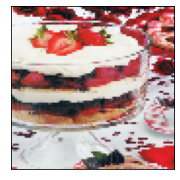

In [54]:
plt.figure(figsize=(6,3))
plt.xticks([])
plt.yticks([])
plt.imshow(combined_val_images[9999])

In [55]:
train_labels = np.zeros(combined_train_images.shape[0])
val_labels = np.zeros(combined_val_images.shape[0])
test_labels = np.zeros(combined_test_images.shape[0])
val = 0
for i in range(int(combined_train_images.shape[0]/400)):
  train_labels[(i * train_slice) : (i * train_slice) + train_slice] = val
  val = val + 1

val = 0
for i in range(int(combined_train_images.shape[0]/400)):
  val_labels[(i * val_slice) : (i * val_slice) + val_slice] = val
  test_labels[(i * test_slice) : (i * test_slice) + test_slice] = val
  val = val + 1

test_labels[9000:10000]

array([90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 91., 91., 91., 91.,
       91., 91., 91., 91., 91., 91., 91., 91., 91., 91., 91., 91., 91.,
       91., 91., 91., 91., 91., 91., 91., 91., 91., 91., 91., 91., 91.,
       91., 91., 91., 91., 91., 91., 91., 91., 91., 91., 91., 91., 91.,
       91., 91., 91., 91., 91., 91., 91., 91., 91., 91., 91., 91., 91.,
       91., 91., 91., 91., 91., 91., 91., 91., 91., 91., 91., 91., 91.,
       91., 91., 91., 91., 91., 91., 91., 91., 91., 91., 91., 91

In [56]:
from numpy import argmax
from tensorflow.keras.utils import to_categorical
# one hot encode
train_labels_encoded = to_categorical(train_labels)
val_labels_encoded = to_categorical(val_labels)
test_labels_encoded = to_categorical(test_labels)
print(train_labels_encoded.shape)
print(val_labels_encoded.shape)
print(test_labels_encoded.shape)

(40000, 100)
(10000, 100)
(10000, 100)


In [57]:
from tensorflow.keras import applications
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, GlobalMaxPooling2D

base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (84,84,3))
x = base_model.output
x = GlobalMaxPooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(100, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(combined_train_images, train_labels_encoded, epochs = 80, validation_data=(combined_val_images, val_labels_encoded))


Epoch 1/80
1250/1250 [==============================] - 84s 62ms/step - loss: 7.5952 - accuracy: 0.0151 - val_loss: 5.7875 - val_accuracy: 0.0189
Epoch 2/80
1250/1250 [==============================] - 76s 61ms/step - loss: 6.3188 - accuracy: 0.0211 - val_loss: 39.6360 - val_accuracy: 0.0384
Epoch 3/80
1250/1250 [==============================] - 76s 60ms/step - loss: 5.7457 - accuracy: 0.0432 - val_loss: 4.3919 - val_accuracy: 0.0671
Epoch 4/80
1250/1250 [==============================] - 76s 61ms/step - loss: 5.3966 - accuracy: 0.0651 - val_loss: 4.8963 - val_accuracy: 0.0908
Epoch 5/80
1250/1250 [==============================] - 76s 60ms/step - loss: 5.1671 - accuracy: 0.0824 - val_loss: 19.3511 - val_accuracy: 0.0878
Epoch 6/80
1250/1250 [==============================] - 76s 60ms/step - loss: 5.1572 - accuracy: 0.0970 - val_loss: 3.8139 - val_accuracy: 0.1238
Epoch 7/80
1250/1250 [==============================] - 76s 61ms/step - loss: 4.9145 - accuracy: 0.1218 - val_loss: 13.549

In [58]:
preds = model.evaluate(combined_test_images, test_labels_encoded)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

313/313 [==============================] - 6s 21ms/step - loss: 967.6267 - accuracy: 0.2805
Loss = 967.626708984375
Test Accuracy = 0.28049999475479126
